<a href="https://colab.research.google.com/github/hritikboss/Zomato-webpage/blob/master/hand%20written%20Digit%20prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Hand Written Digit Prediction**

**Import library**

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**import data**

In [4]:
from sklearn.datasets import load_digits

In [5]:
df = load_digits()

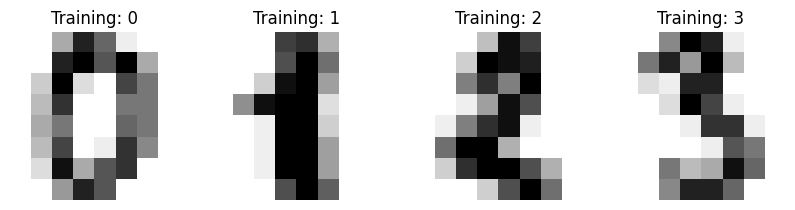

In [6]:
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))

for ax, image, label in zip(axes, df.images, df.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title("Training: %i" % label)

**data preprocessing**

In [7]:
df.images.shape

(1797, 8, 8)

In [8]:
df.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [9]:
df.images[0].shape

(8, 8)

In [10]:
len(df.images)


1797

In [11]:
n_samples = len(df.images)
data = df.images.reshape((n_samples, -1))

In [12]:
data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [13]:
data[0].shape

(64,)

In [14]:
data.shape

(1797, 64)

**scaling image**

In [15]:
data.min()

0.0

In [16]:
data.max()

16.0

In [17]:
data = data/16

In [24]:
data.min()

0.0

In [18]:
data.max()

1.0

In [19]:
data[0]

array([0.    , 0.    , 0.3125, 0.8125, 0.5625, 0.0625, 0.    , 0.    ,
       0.    , 0.    , 0.8125, 0.9375, 0.625 , 0.9375, 0.3125, 0.    ,
       0.    , 0.1875, 0.9375, 0.125 , 0.    , 0.6875, 0.5   , 0.    ,
       0.    , 0.25  , 0.75  , 0.    , 0.    , 0.5   , 0.5   , 0.    ,
       0.    , 0.3125, 0.5   , 0.    , 0.    , 0.5625, 0.5   , 0.    ,
       0.    , 0.25  , 0.6875, 0.    , 0.0625, 0.75  , 0.4375, 0.    ,
       0.    , 0.125 , 0.875 , 0.3125, 0.625 , 0.75  , 0.    , 0.    ,
       0.    , 0.    , 0.375 , 0.8125, 0.625 , 0.    , 0.    , 0.    ])

**train test split**

In [21]:
from sklearn.model_selection import train_test_split
y_test, y_train, x_test, x_train = train_test_split(df.target, data, test_size=0.3)

In [22]:
y_test.shape, y_train.shape, x_test.shape, x_train.shape

((1257,), (540,), (1257, 64), (540, 64))

**random forest model**

In [29]:
from sklearn.ensemble import RandomForestClassifier

# Create an instance of the RandomForestClassifier
rf = RandomForestClassifier()

# Fit the model to the training data
rf.fit(x_train, y_train)

RandomForestClassifier()

**predict test data**

In [30]:
y_pred = rf.predict(x_test)

In [33]:
y_pred

array([4, 1, 7, ..., 7, 5, 0])

**model accuracy**

In [38]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)


array([[121,   0,   0,   0,   0,   0,   0,   0,   1,   0],
       [  0, 129,   3,   0,   0,   0,   1,   0,   1,   1],
       [  0,   0, 115,   0,   0,   0,   0,   0,   0,   1],
       [  0,   1,   0, 115,   0,   2,   0,   3,   5,   0],
       [  1,   1,   0,   0, 120,   0,   1,   3,   1,   1],
       [  0,   0,   0,   1,   1, 125,   0,   0,   1,   2],
       [  1,   0,   0,   0,   1,   1, 113,   0,   0,   0],
       [  0,   0,   0,   0,   1,   0,   0, 129,   5,   0],
       [  0,   4,   1,   1,   1,   2,   0,   1, 103,   1],
       [  0,   0,   0,   5,   0,   2,   0,   3,   6, 119]])

In [40]:
from  sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       122
           1       0.96      0.96      0.96       135
           2       0.97      0.99      0.98       116
           3       0.94      0.91      0.93       126
           4       0.97      0.94      0.95       128
           5       0.95      0.96      0.95       130
           6       0.98      0.97      0.98       116
           7       0.93      0.96      0.94       135
           8       0.84      0.90      0.87       114
           9       0.95      0.88      0.92       135

    accuracy                           0.95      1257
   macro avg       0.95      0.95      0.95      1257
weighted avg       0.95      0.95      0.95      1257

